In [1]:
!pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
import keras_tuner as kf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [3]:
alphabet = pd.read_csv("/content/Alphabets_data.csv")

In [4]:
alphabet

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
0          T     2     8      3       5      1     8    13      0      6   
1          I     5    12      3       7      2    10     5      5      4   
2          D     4    11      6       8      6    10     6      2      6   
3          N     7    11      6       6      3     5     9      4      6   
4          G     2     1      3       1      1     8     6      6      6   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19995      D     2     2      3       3      2     7     7      7      6   
19996      C     7    10      8       8      4     4     8      6      9   
19997      T     6     9      6       7      5     6    11      3      7   
19998      S     2     3      4       2      1     8     7      2      6   
19999      A     4     9      6       6      2     9     5      3      1   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          6      10       8      0       8      0       8  
1         13       3       9      2       8      4      10  
2         10       3       7      3       7      3       9  
3          4       4      10      6      10      2       8  
4          6       5       9      1       7      5      10  
...      ...     ...     ...    ...     ...    ...     ...  
19995      6       6       4      2       8      3       7  
19996     12       9      13      2       9      3       7  
19997     11       9       5      2      12      2       4  
19998     10       6       8      1       9      5       8  
19999      8       1       8      2       7      2       8  

[20000 rows x 17 columns]

In [5]:
alphabet.describe()

xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.380823      2.488475   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

            x2ybar        xy2bar         xedge        xedgey         yedge  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.45400      7.929000      3.046100      8.338850      3.691750   
std        2.63107      2.080619      2.332541      1.546722      2.567073   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        5.00000      7.000000      1.000000      8.000000      2.000000   
50%        6.00000      8.000000      3.000000      8.000000      3.000000   
75%        8.00000      9.000000      4.000000      9.000000      5.000000   
max       15.00000     15.000000     15.000000     15.000000     15.000000   

            yedgex  
count  20000.00000  
mean       7.80120  
std        1.61747  
min        0.00000  
25%        7.00000  
50%        8.00000  
75%        9.00000  
max       15.00000

In [6]:
alphabet.describe(include = object)

letter
count   20000
unique     26
top         U
freq      813

In [7]:
alphabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [8]:
alphabet.duplicated().sum()

1332

In [9]:
alphabet.drop_duplicates(inplace=True)  #dropped the duplicated columns

In [10]:
alphabet.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

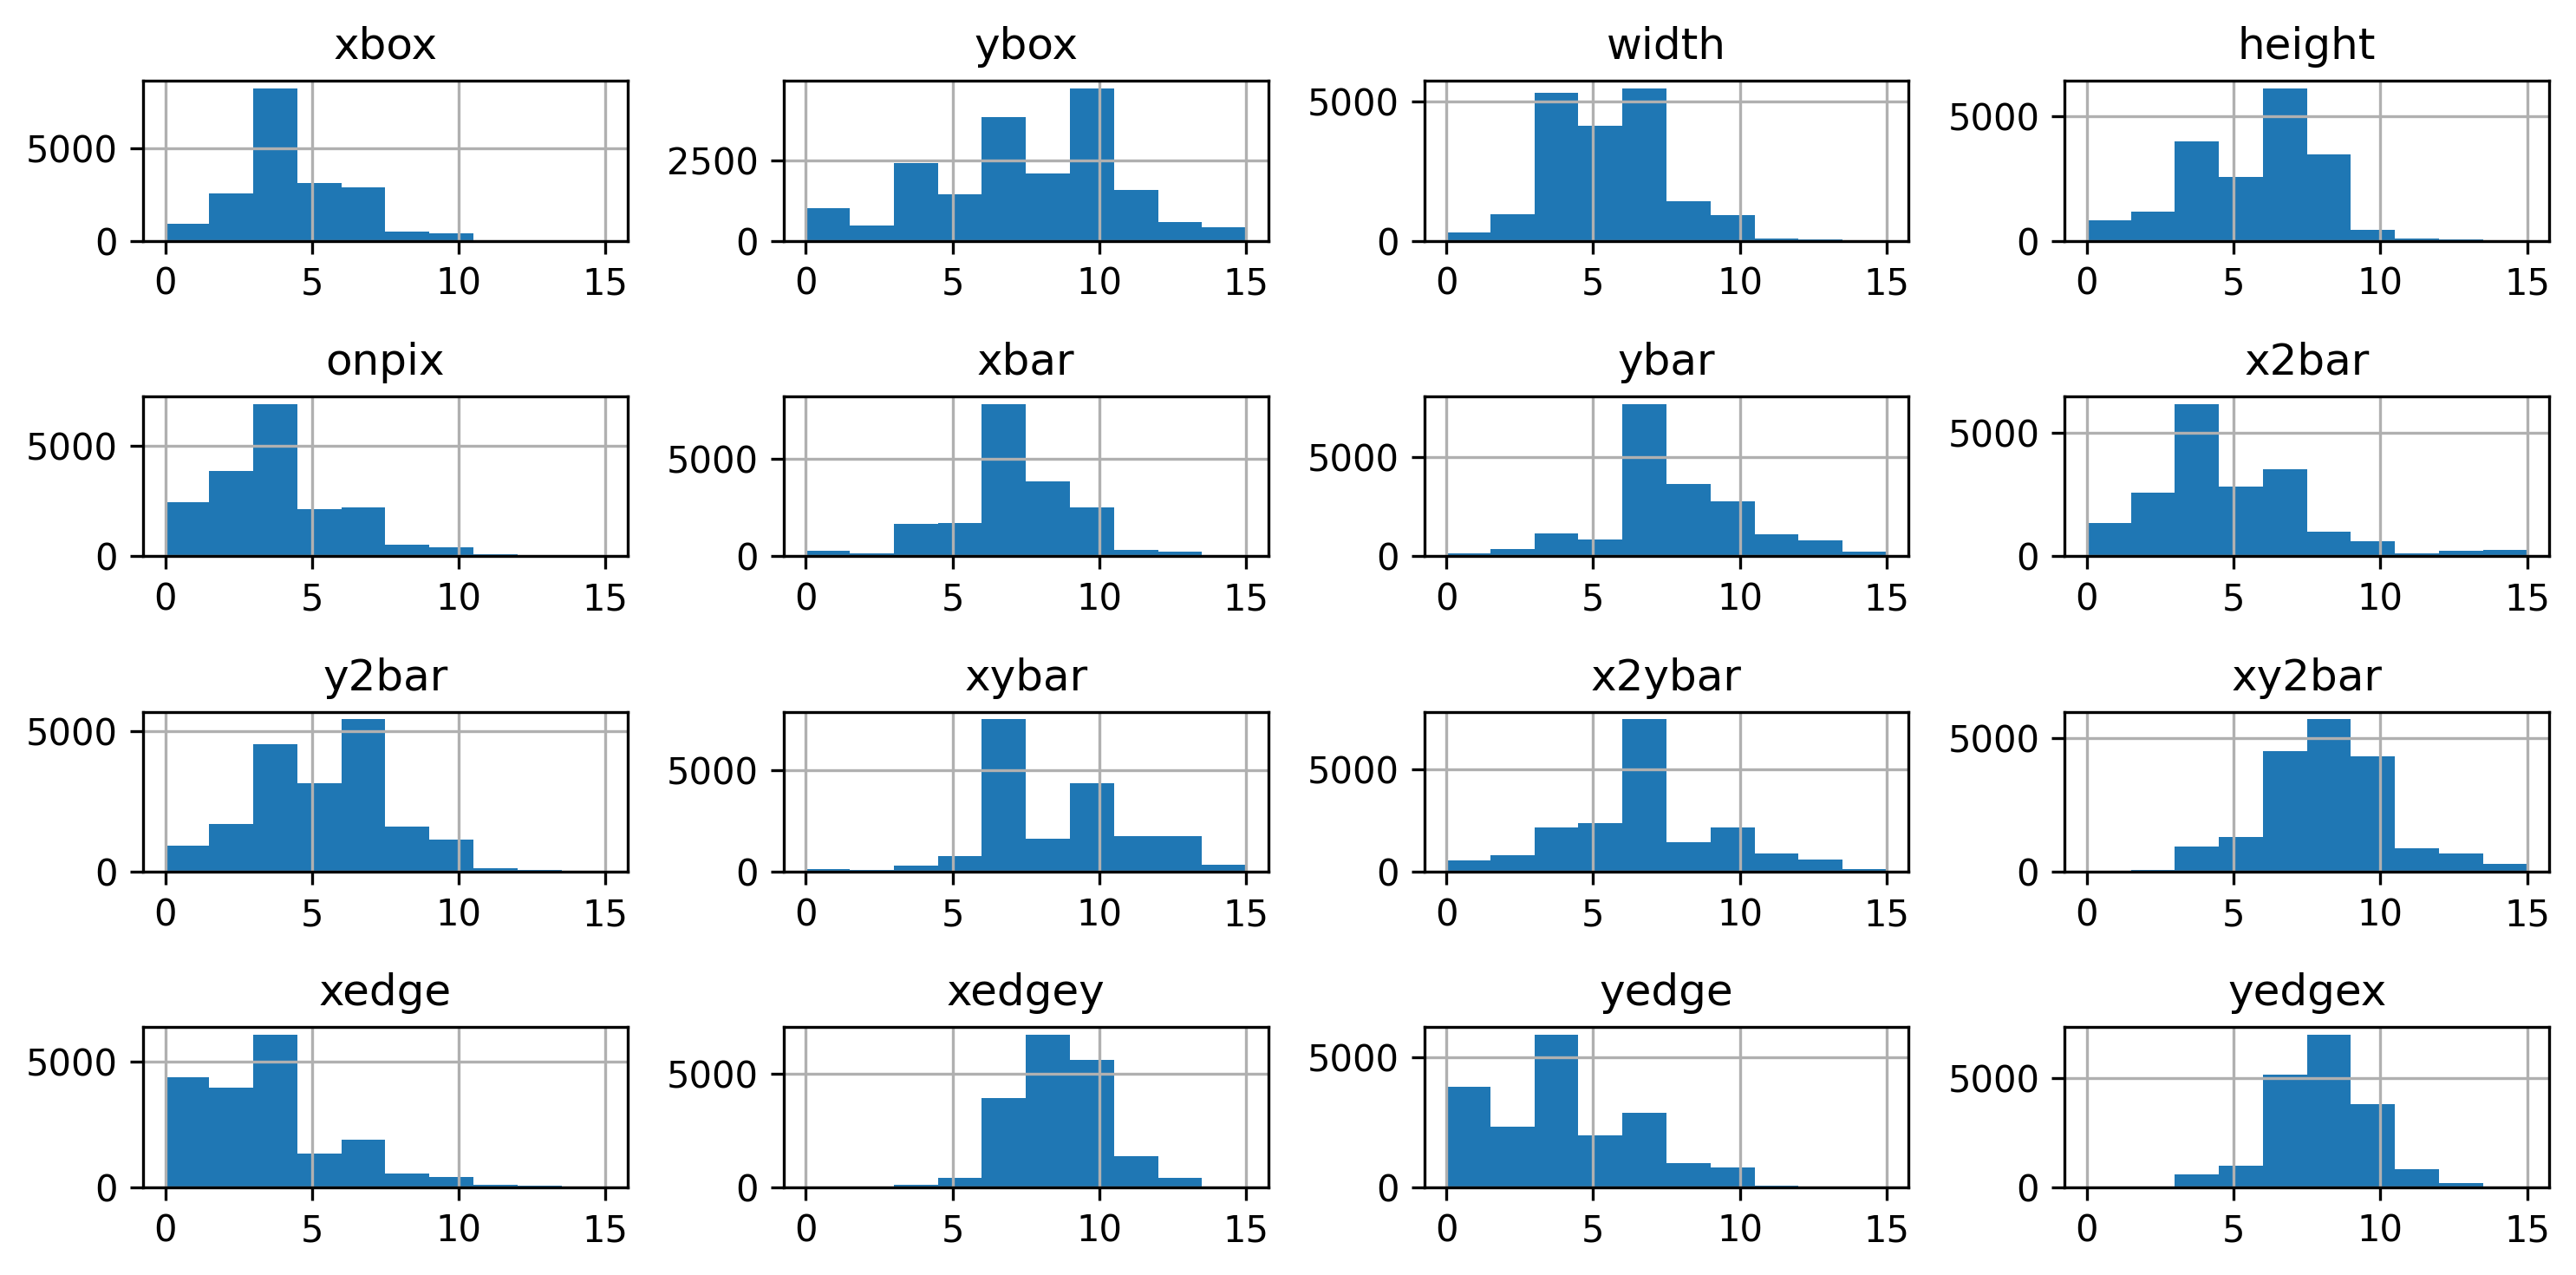

In [11]:
alphabet.hist()   #we can observe skewness
plt.tight_layout()

<Axes: >

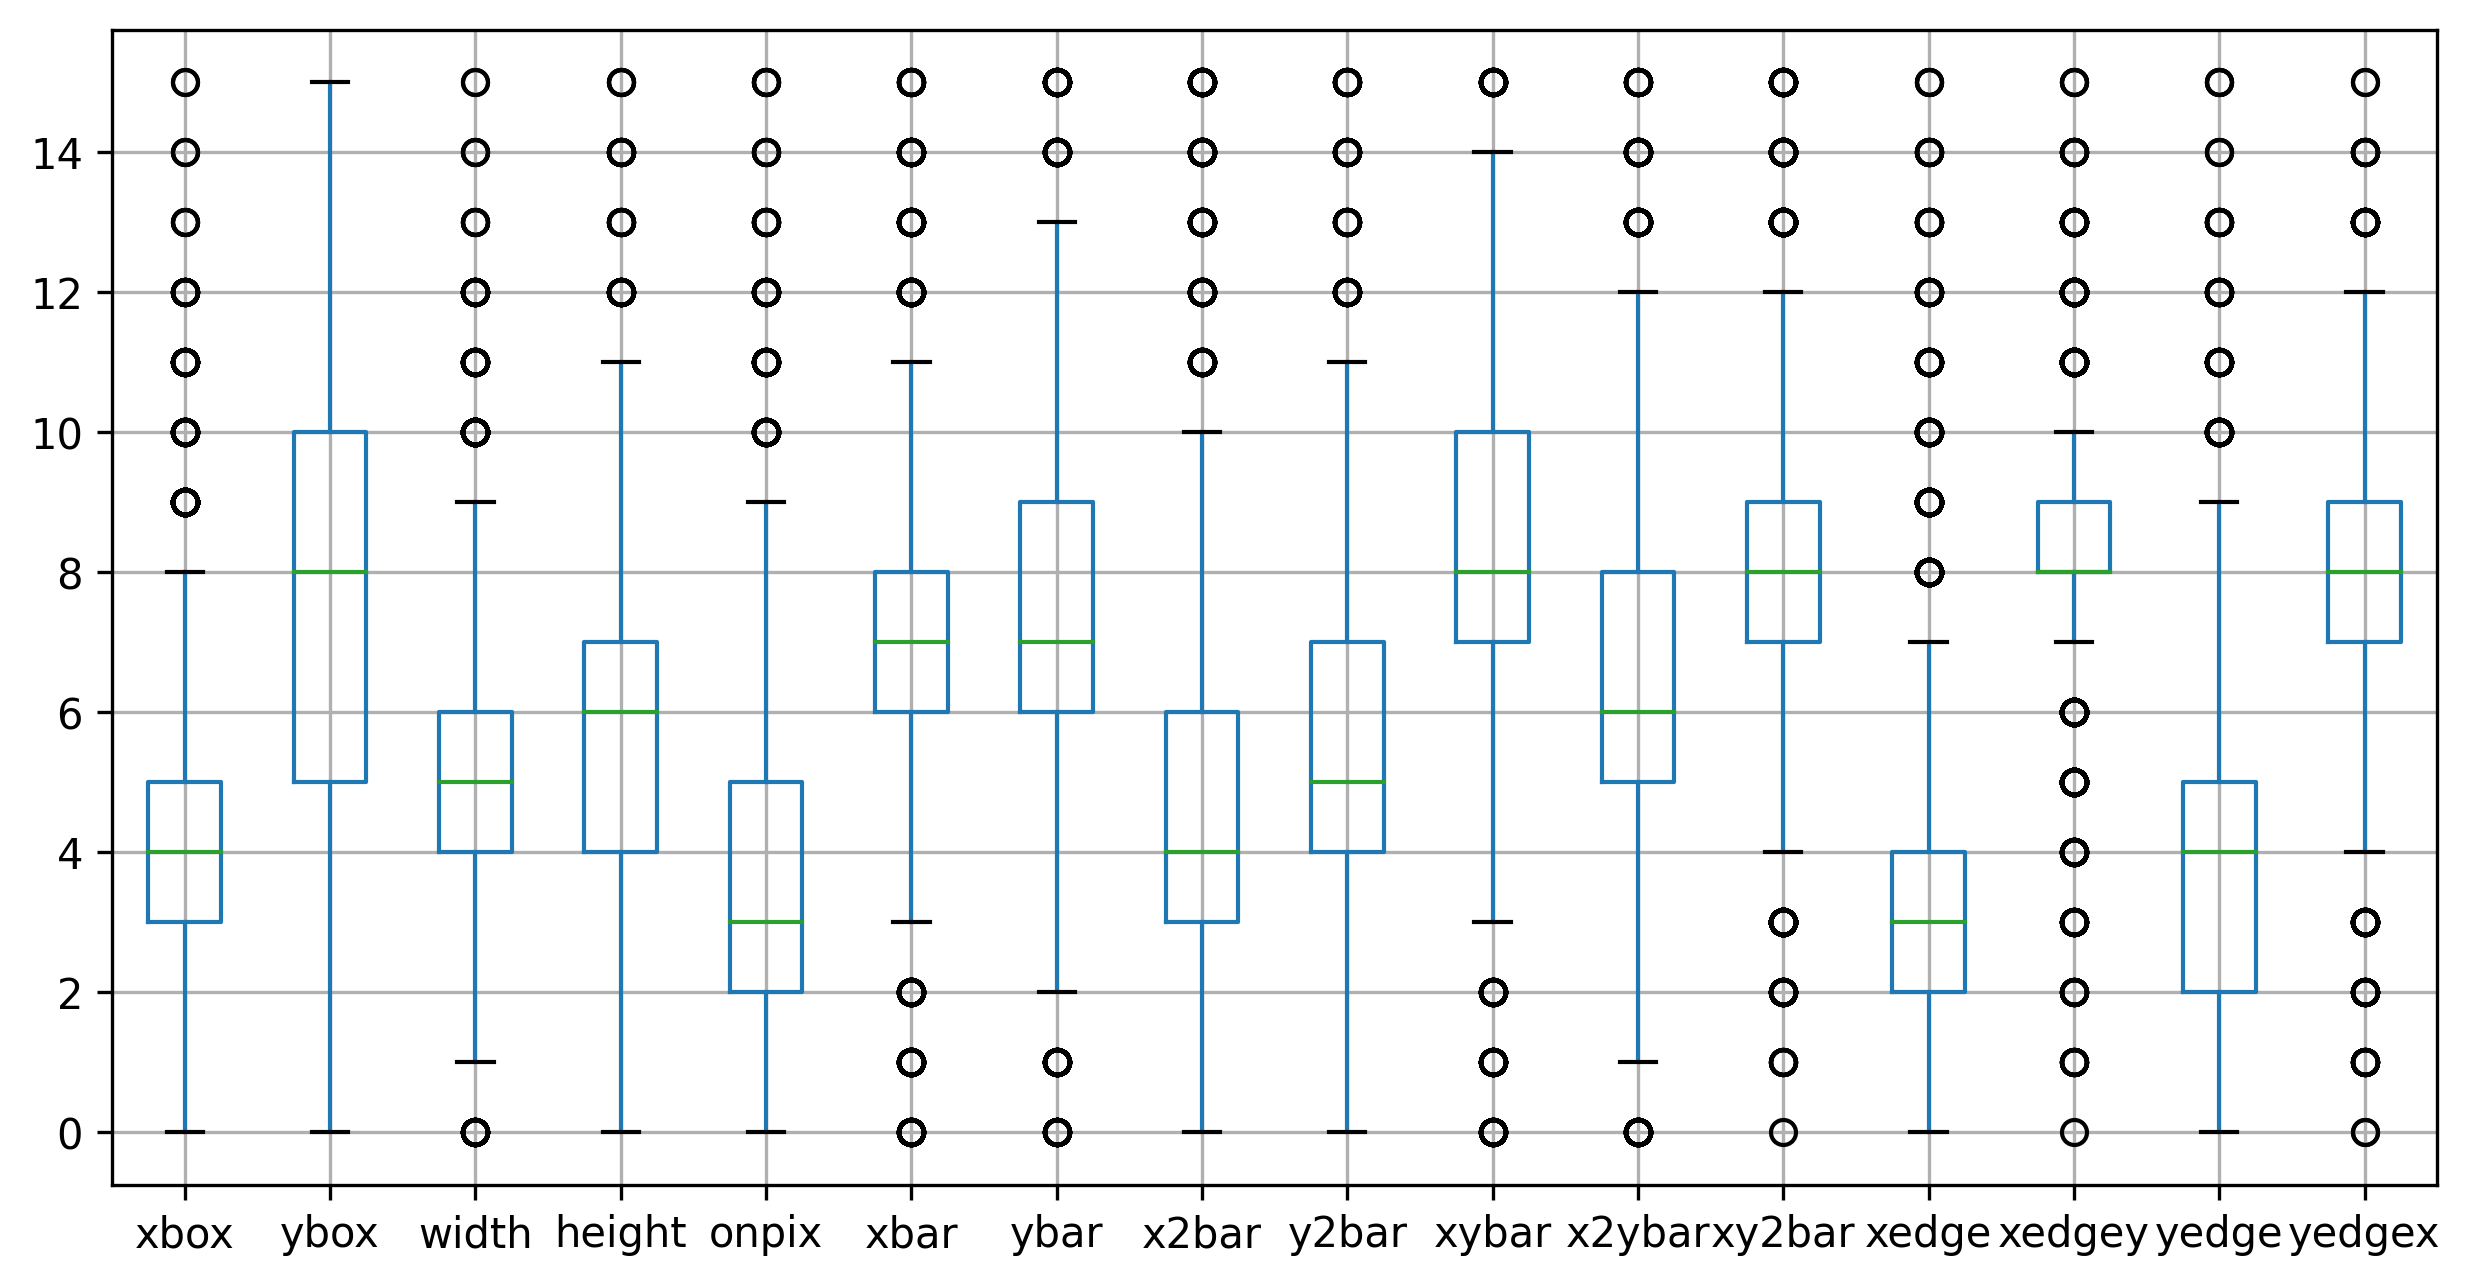

In [12]:
alphabet.boxplot()   #outliers in almost all of them

In [13]:
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)    #user defined function for outliers
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme

In [14]:
X = alphabet.iloc[:,1:17]
Y = alphabet['letter']

In [15]:
outlier_detection(X, X.columns)

(xbox      0.0
 ybox     -2.5
 width     1.0
 height   -0.5
 onpix    -2.5
 xbar      3.0
 ybar      1.5
 x2bar    -1.5
 y2bar    -0.5
 xybar     2.5
 x2ybar    0.5
 xy2bar    4.0
 xedge    -1.0
 xedgey    6.5
 yedge    -2.5
 yedgex    4.0
 dtype: float64,
 xbox       8.0
 ybox      17.5
 width      9.0
 height    11.5
 onpix      9.5
 xbar      11.0
 ybar      13.5
 x2bar     10.5
 y2bar     11.5
 xybar     14.5
 x2ybar    12.5
 xy2bar    12.0
 xedge      7.0
 xedgey    10.5
 yedge      9.5
 yedgex    12.0
 dtype: float64)

In [16]:
X.loc[X['xbox']>8.0,'xbox'] = 8.0

In [17]:
X.loc[X['width']>9.0,'width'] = 9.0
X.loc[X['width']<1.0,'width'] = 1.0

In [18]:
X.loc[X['height']>11.5,'height'] = 11.5

In [19]:
X.loc[X['onpix']>9.5,'onpix'] = 9.5

In [20]:
X.loc[X['xbar']>11.0,'xbar'] = 11.0
X.loc[X['xbar']<3.0,'xbar'] = 3.0

In [21]:
X.loc[X['ybar']>13.5,'ybar'] = 13.5
X.loc[X['ybar']<1.5,'ybar'] = 1.5

In [22]:
X.loc[X['x2bar']>10.5,'x2bar'] = 10.5

In [23]:
X.loc[X['y2bar']>11.5,'y2bar'] = 11.5

In [24]:
X.loc[X['xybar']>14.5,'xybar'] = 14.5
X.loc[X['xybar']<2.5,'xybar'] = 2.5

In [25]:
X.loc[X['x2ybar']>12.5,'x2ybar'] = 12.5
X.loc[X['x2ybar']<0.5,'x2ybar'] = 0.5

In [26]:
X.loc[X['xy2bar']>12.0,'xy2bar'] = 12.0
X.loc[X['xy2bar']<4.0,'xy2bar'] = 4.0

In [27]:
X.loc[X['xedge']>7.0,'xedge'] = 7.0

In [28]:
X.loc[X['xedgey']>10.5,'xedgey'] = 10.5
X.loc[X['xedgey']<6.5,'xedgey'] = 6.5

In [29]:
X.loc[X['yedge']>9.5,'yedge'] =9.5

In [30]:
X.loc[X['yedgex']>12.0,'yedgex'] = 12.0
X.loc[X['yedgex']<4.0,'yedgex'] = 4.0

<Axes: >

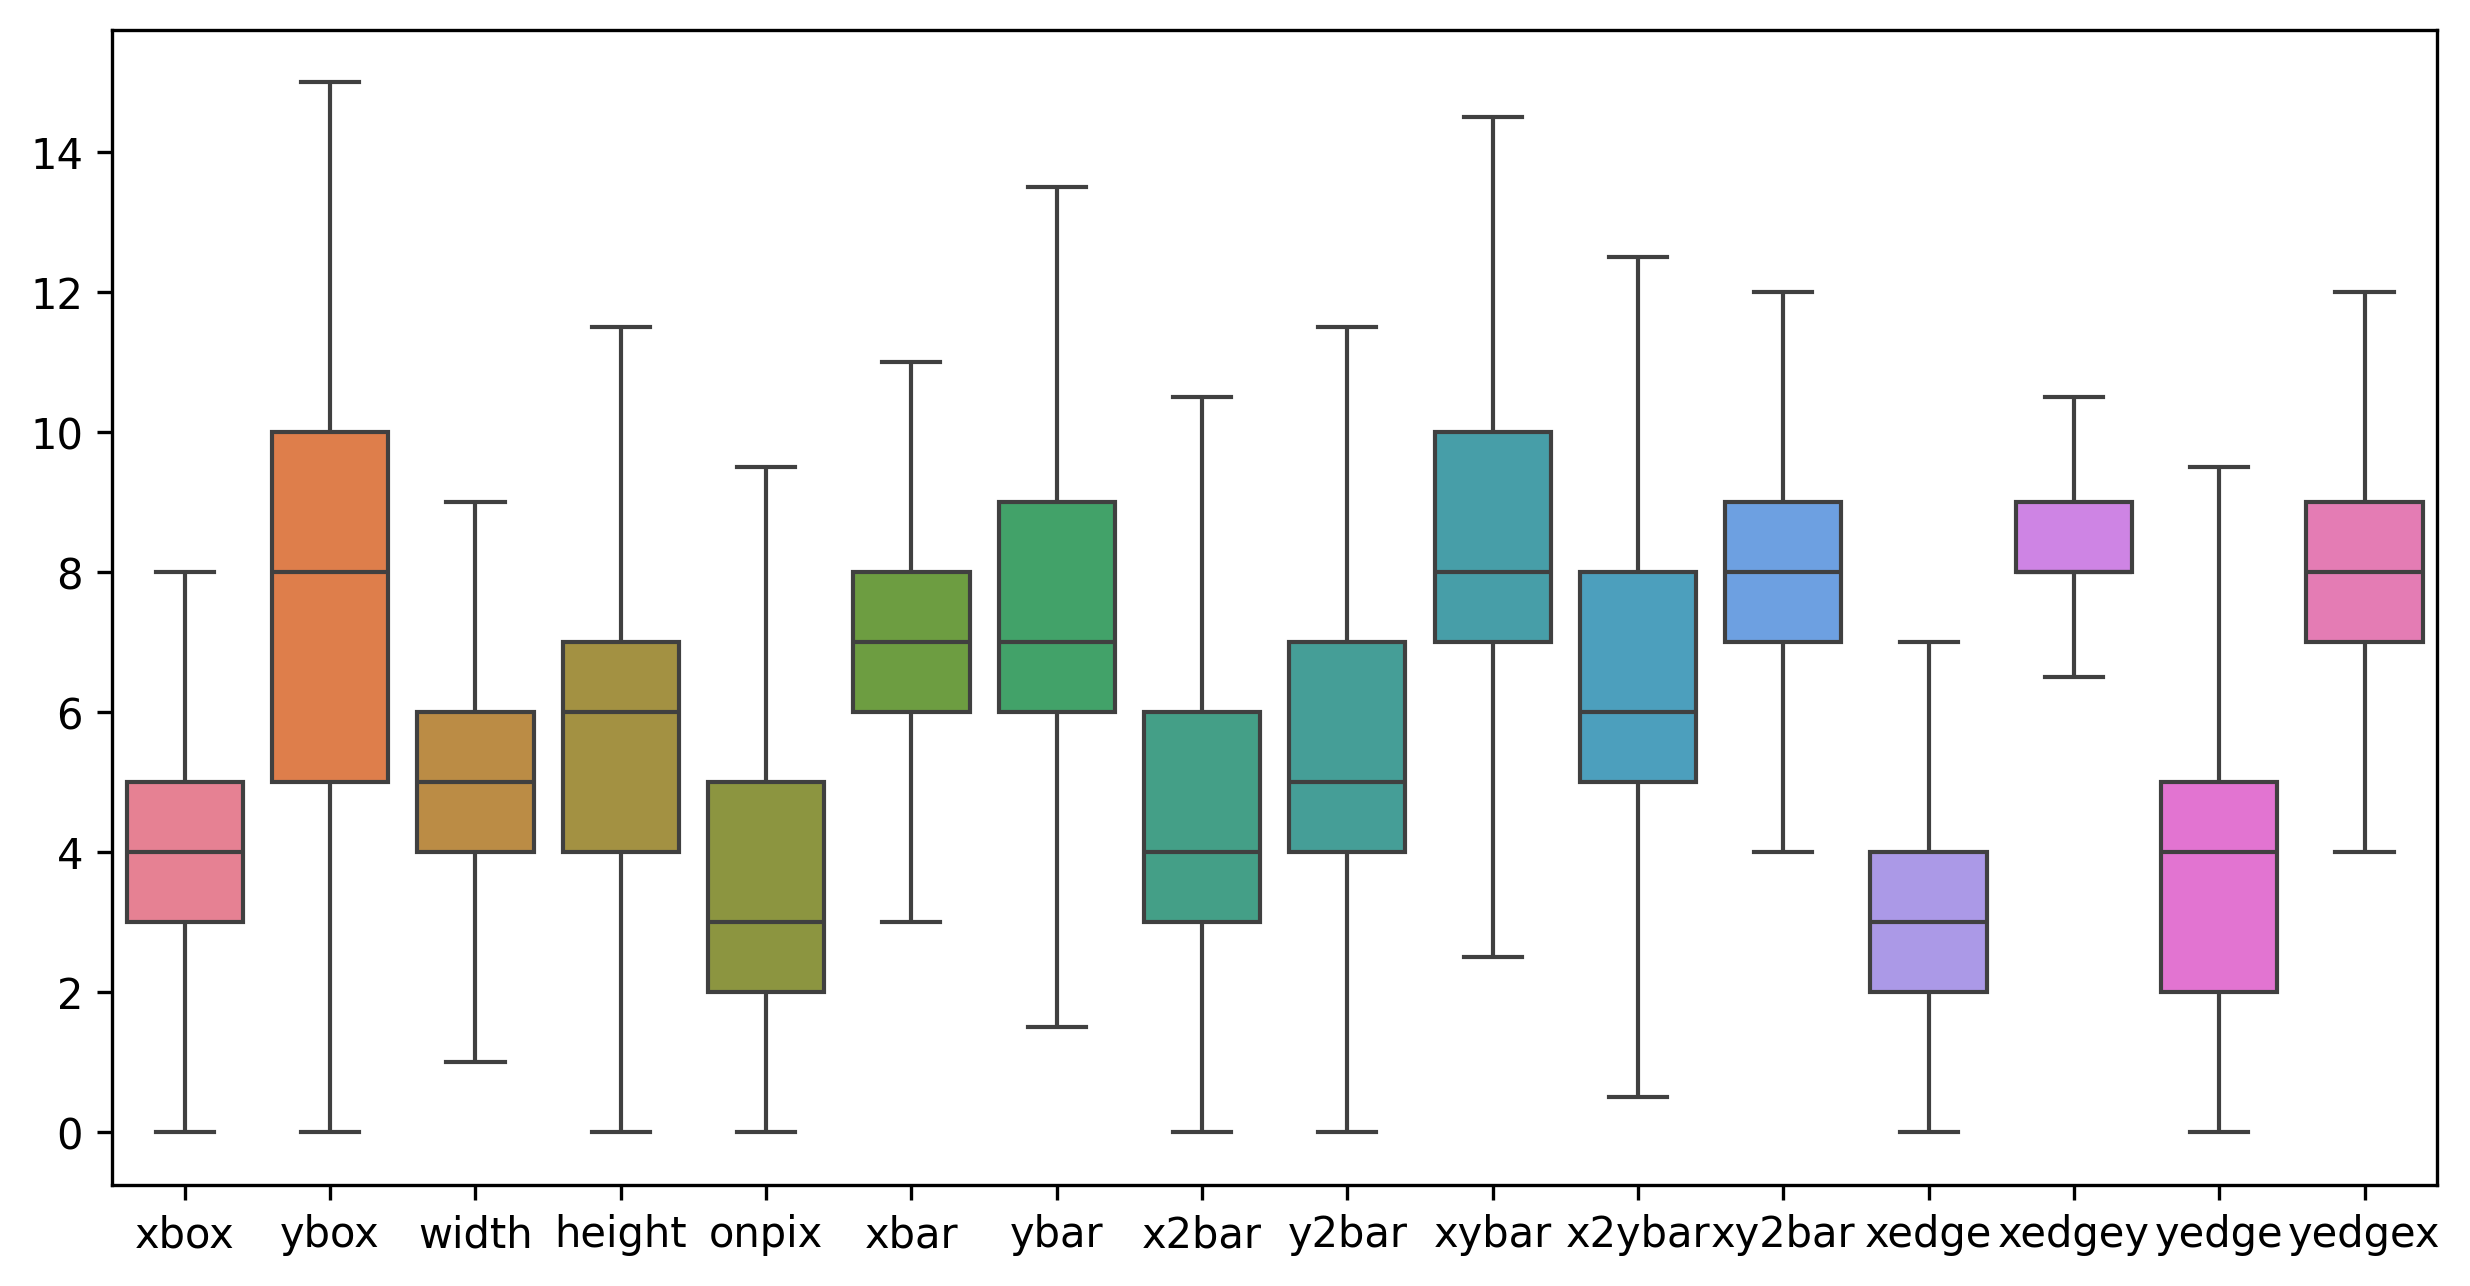

In [31]:
sns.boxplot(X)            #all outliers are treated

In [32]:
sns.pairplot(X)

<Axes: >

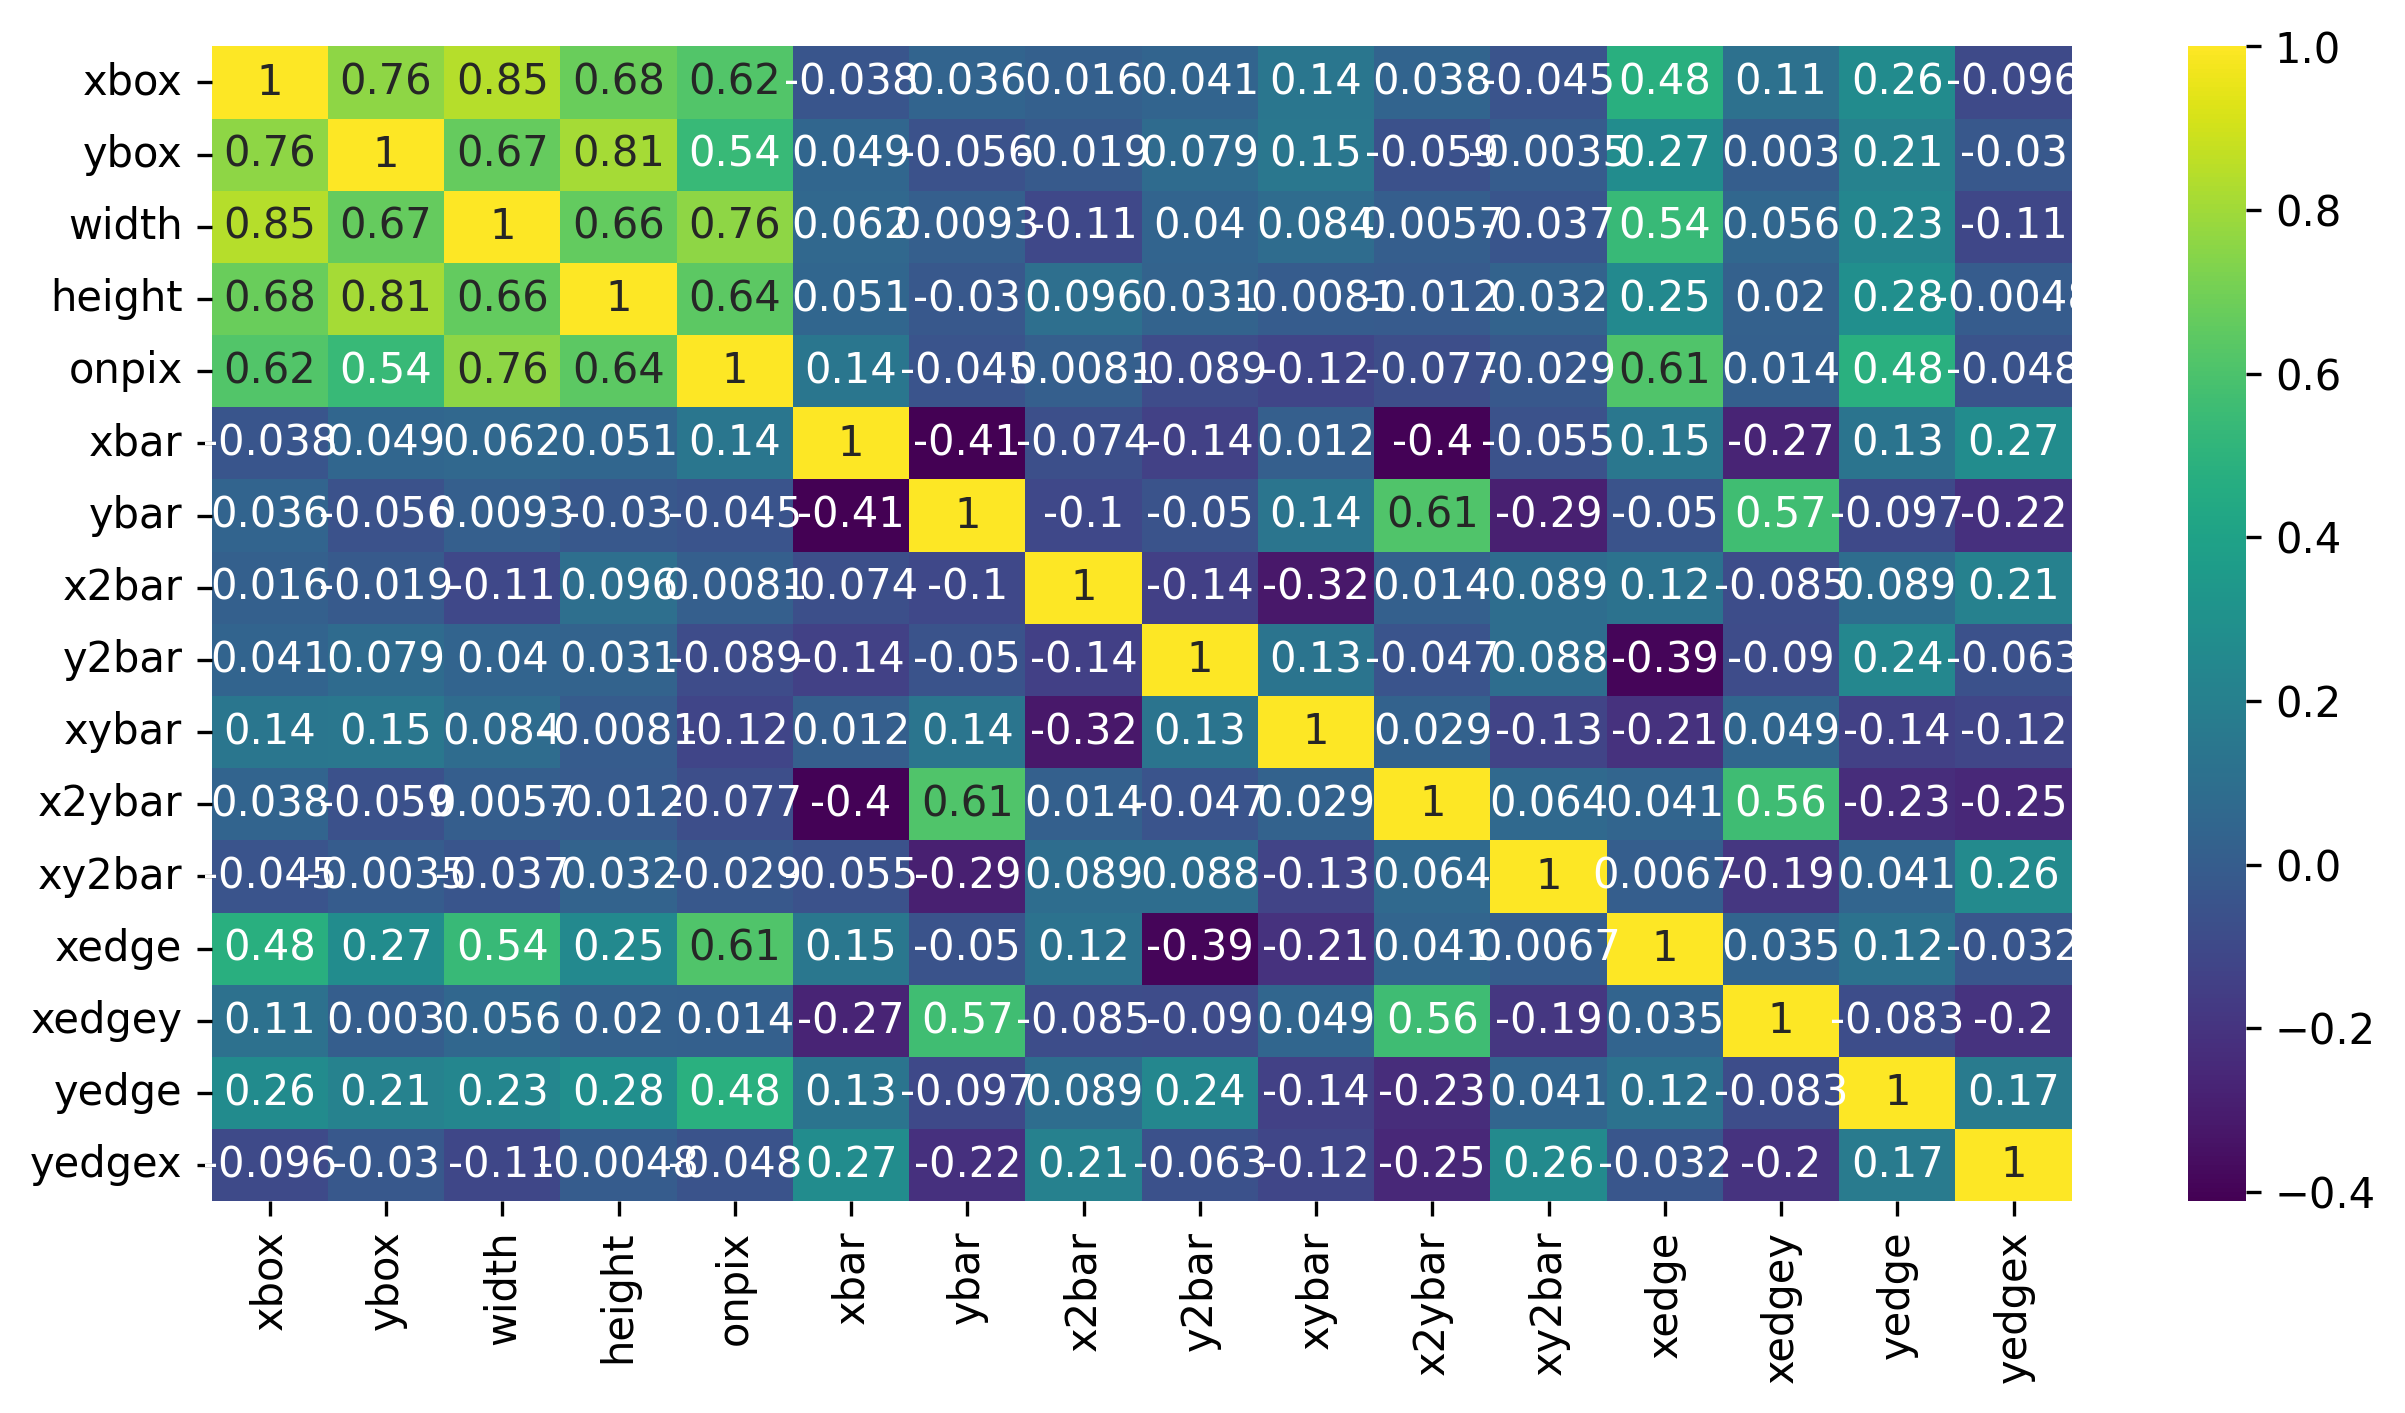

In [33]:
sns.heatmap(X.corr(),annot=True,cmap='viridis')   #xbox and width is highly correlated

In [34]:
sc = StandardScaler()
x = sc.fit_transform(X)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(Y)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state=1)

# **Model**

In [37]:

ann = Sequential()# random weights are initialized so every time you will get different accuracy and loss

ann.add(Dense(units = 10, activation = 'relu'))# hidden layer
ann.add(Dense(units = 1, activation = 'sigmoid'))# output layer

ann.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics ='accuracy')

ann.fit(x_train,y_train,epochs = 100)

Epoch 1/100
409/409 [==============================] - 1s 2ms/step - loss: 15.3537 - accuracy: 0.0240
Epoch 2/100
409/409 [==============================] - 1s 2ms/step - loss: 15.2238 - accuracy: 0.0240
Epoch 3/100
409/409 [==============================] - 1s 2ms/step - loss: 15.0859 - accuracy: 0.0242
Epoch 4/100
409/409 [==============================] - 1s 2ms/step - loss: 14.9412 - accuracy: 0.0242
Epoch 5/100
409/409 [==============================] - 1s 2ms/step - loss: 14.7915 - accuracy: 0.0242
Epoch 6/100
409/409 [==============================] - 1s 2ms/step - loss: 14.6383 - accuracy: 0.0243
Epoch 7/100
409/409 [==============================] - 1s 2ms/step - loss: 14.4832 - accuracy: 0.0243
Epoch 8/100
409/409 [==============================] - 1s 1ms/step - loss: 14.3260 - accuracy: 0.0243
Epoch 9/100
409/409 [==============================] - 1s 2ms/step - loss: 14.1666 - accuracy: 0.0244
Epoch 10/100
409/409 [==============================] - 1s 1ms/step - loss: 14.005

In [38]:
ypred = ann.predict(x_test)
ypred = ypred > 0.5
ypred

176/176 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [39]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.01      0.09      0.02       239
           1       0.04      0.57      0.07       220
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       225
           4       0.00      0.00      0.00       207
           5       0.00      0.00      0.00       237
           6       0.00      0.00      0.00       215
           7       0.00      0.00      0.00       198
           8       0.00      0.00      0.00       166
           9       0.00      0.00      0.00       218
          10       0.00      0.00      0.00       209
          11       0.00      0.00      0.00       198
          12       0.00      0.00      0.00       222
          13       0.00      0.00      0.00       218
          14       0.00      0.00      0.00       218
          15       0.00      0.00      0.00       249
          16       0.00      0.00      0.00       233
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
ann.evaluate(x_train,y_train)

409/409 [==============================] - 1s 1ms/step - loss: -0.6656 - accuracy: 0.0279


[-0.6655979156494141, 0.02793296054005623]

# **Hyperparameter tuning**

In [41]:
list(range(8,128,8))

[8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120]

In [42]:
# This function optimizes No. of layers, No. of neurons in each layer, activation function and optimizer
def hyper(hp): #This defines a function named hyper that takes a single argument hp.
    model = Sequential()
    counter = 0 #Initializes a counter variable to keep track of the current layer being added to the model.
    for i in range(hp.Int('num_layers', min_value = 1,max_value=10)):  # Find No. of hiddern layers: Loops through a range of layers,
        # where the number of layers is a hyperparameter named 'num_layers' with a minimum value of 1 and a maximum value of 10.
        # No. of Hidden layers are 1 to 10. In each layer need to add no. of neurons and activation function. So following if-else code
        if counter == 0: # If block to find no. of hidden layers, will be executed only once
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                            activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid']),
                            input_dim = 16))
            #Adds the first layer with input dimensions specified by input_dim=13.
            #The number of units ('units') and activation function ('activation') are hyperparameters,
            #and their values are determined by the hp object.
        else: # else block to find no of neurons and activation function
          model.add(Dense(
              hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
              activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid'])))

              #Adds subsequent layers (after the first layer) with hyperparameter-specified units and activation functions.

    counter+=1   #Increments the counter to keep track of the layers added.
    model.add(Dense(units = 1,activation='sigmoid'))   #Adds the output layer with a single unit and sigmoid activation function, typical for binary classification problems.
    model.compile(optimizer = hp.Choice('optimizer',values = ['adam','rmsprop','sgd']),
                loss = 'binary_crossentropy',metrics = 'accuracy')
    return model  #Returns the compiled model.

In [43]:
tuner = kf.RandomSearch(hyper,
                        objective = 'val_accuracy',
                        max_trials = 3)

In [44]:
tuner.search(x_train,y_train,epochs = 10, validation_data = (x_test,y_test))

Trial 3 Complete [00h 00m 12s]
val_accuracy: 0.039278700947761536

Best val_accuracy So Far: 0.039278700947761536
Total elapsed time: 00h 00m 56s


In [45]:
tuner.get_best_hyperparameters()[0].values # will give first model where accuracy is high

{'num_layers': 3,
 'units0': 32,
 'activation0': 'sigmoid',
 'optimizer': 'adam',
 'units1': 8,
 'activation1': 'relu',
 'units2': 8,
 'activation2': 'relu'}

In [46]:
tuned_model = tuner.get_best_models(num_models=1)[0]
# tuned_model.build(x.shape)

In [47]:
tuned_model.fit(x_train,y_train,epochs=50, validation_data=(x_test,y_test))

Epoch 1/50
409/409 [==============================] - 2s 3ms/step - loss: -5973.2144 - accuracy: 0.0390 - val_loss: -13913.5225 - val_accuracy: 0.0393
Epoch 2/50
409/409 [==============================] - 1s 2ms/step - loss: -29617.2168 - accuracy: 0.0390 - val_loss: -50082.0508 - val_accuracy: 0.0393
Epoch 3/50
409/409 [==============================] - 1s 2ms/step - loss: -79911.3438 - accuracy: 0.0390 - val_loss: -115305.5547 - val_accuracy: 0.0393
Epoch 4/50
409/409 [==============================] - 1s 2ms/step - loss: -160862.1719 - accuracy: 0.0390 - val_loss: -212587.5625 - val_accuracy: 0.0393
Epoch 5/50
409/409 [==============================] - 1s 2ms/step - loss: -274814.1250 - accuracy: 0.0390 - val_loss: -343806.8750 - val_accuracy: 0.0393
Epoch 6/50
409/409 [==============================] - 1s 2ms/step - loss: -423468.7500 - accuracy: 0.0390 - val_loss: -510556.5938 - val_accuracy: 0.0393
Epoch 7/50
409/409 [==============================] - 1s 2ms/step - loss: -608196.

In [48]:
tuned_model.evaluate(x_train,y_train) # Training accuracy

409/409 [==============================] - 2s 5ms/step - loss: -67766840.0000 - accuracy: 0.0390


[-67766840.0, 0.03902961686253548]

In [49]:
tuned_model.evaluate(x_test,y_test)# Testing accuracy

176/176 [==============================] - 1s 6ms/step - loss: -67819584.0000 - accuracy: 0.0393


[-67819584.0, 0.039278700947761536]

# **Evaluation**

In [50]:
from sklearn.metrics import classification_report
ypred = tuned_model.predict(x_test)
print(classification_report(y_test,ypred))

176/176 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.04      1.00      0.08       220
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       225
           4       0.00      0.00      0.00       207
           5       0.00      0.00      0.00       237
           6       0.00      0.00      0.00       215
           7       0.00      0.00      0.00       198
           8       0.00      0.00      0.00       166
           9       0.00      0.00      0.00       218
          10       0.00      0.00      0.00       209
          11       0.00      0.00      0.00       198
          12       0.00      0.00      0.00       222
          13       0.00      0.00      0.00       218
          14       0.00      0.00      0.00       218
          15       0.00      0.00      0.00       249
          16       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Performance analysis**

performance without hyperparameter tuning : [-9.516613006591797, 0.030611464753746986]      **train accuracy**  

performance with hyperparameter tuning : [-391504.5, 0.03902961686253548] **train accuracy**       
                                       : [-391809.25, 0.039278700947761536]
**test accuracy**


**Effects of using hyperparameter tuning**

Hyperparameter tuning allows us to tweak model performance for optimal results. This process is an essential part of machine learning, and choosing appropriate hyperparameter values is crucial for success.